# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression, RidgeClassifier, LogisticRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Load dataset

In [16]:
X, y = load_diabetes(return_X_y=True)

# Train test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply LinearRegression

In [8]:
reg1 = LinearRegression()
reg1.fit(X_train, y_train)
r2_score(y_test, reg1.predict(X_test))

0.4526027629719195

In [10]:
reg1.intercept_

151.34560453985995

In [9]:
reg1.coef_

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

# Apply Ridge Regression

In [13]:
reg2 = Ridge(alpha=0.1)
reg2.fit(X_train, y_train)
r2_score(y_test, reg2.predict(X_test))

0.46085219464119265

# Make custom dataset

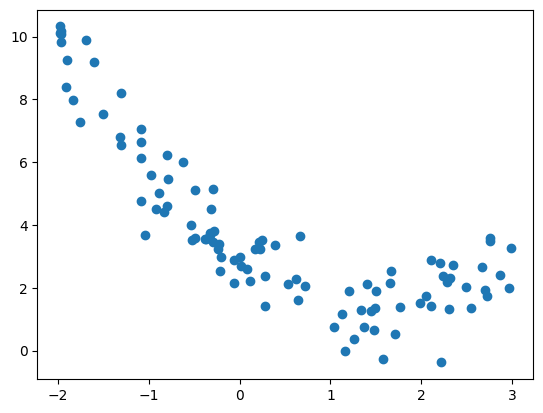

In [14]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

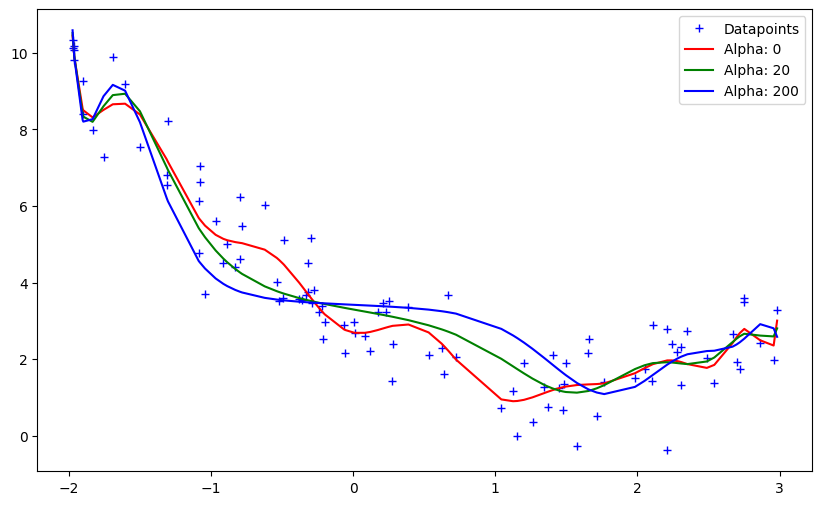

In [17]:
def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()